In [21]:
# Import required libraries
import numpy as np
import scipy
import missingno as msno # Missing values analysis
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Read the datasets
train = pd.read_csv("../data/train.csv", low_memory = False)
test = pd.read_csv("../data/test.csv", low_memory = False)

# Drop all columns that are completely empty
train=train.dropna(axis=1,how='all')
train.head(6)

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,...,GN1,GN1_OTHERS,GN2,GN2_OTHERS,GN3,GN3_OTHERS,GN4,GN4_OTHERS,GN5,GN5_OTHERS
0,0,3,32,3.0,NaN,323011,3854,481,1975,1,...,99.0,NaN,99,NaN,99,NaN,99,NaN,99,NaN
1,1,2,26,NaN,8.0,268131,2441,344,1981,1,...,NaN,NaN,1,NaN,2,NaN,2,NaN,2,NaN
2,2,1,16,NaN,7.0,167581,754,143,1995,1,...,1.0,NaN,2,NaN,2,NaN,2,NaN,2,NaN
3,3,4,44,5.0,NaN,445071,5705,604,1980,1,...,NaN,NaN,2,NaN,2,NaN,99,NaN,99,NaN
4,4,4,43,NaN,6.0,436161,5645,592,1958,1,...,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN
5,5,3,35,NaN,8.0,358081,3319,409,1976,0,...,4.0,NaN,2,NaN,1,NaN,1,NaN,1,NaN


## Missing value analysis

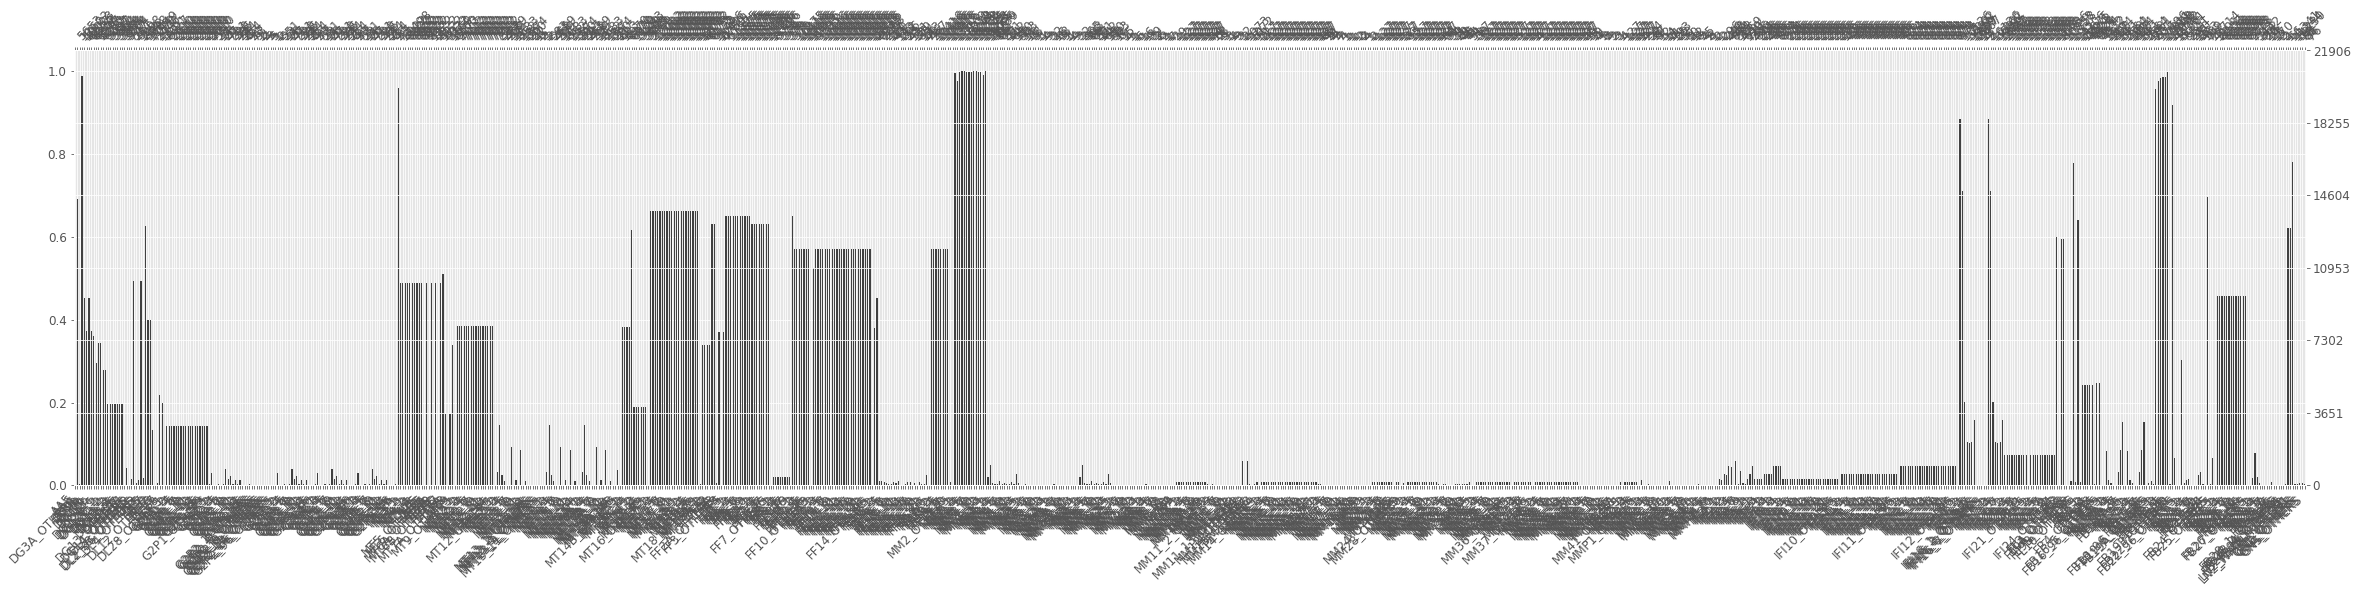

In [48]:
# Bar chart showing nulls by column- too numerous to properly analyse
missingvalue_columns = train.columns[train.isnull().any()].tolist()
msno.bar(train[missingvalue_columns], figsize=(40,8), fontsize=12, labels=True,)

In [46]:
#msno.heatmap(train[missingvalue_columns],figsize=(20,20), fontsize=8)

### Columns clustering by Nullness
Since there are too many columns to analyse/correlate for nullness, we use a hierarchical dendrogram to cluster columns that are strongly correlated in their nullness.

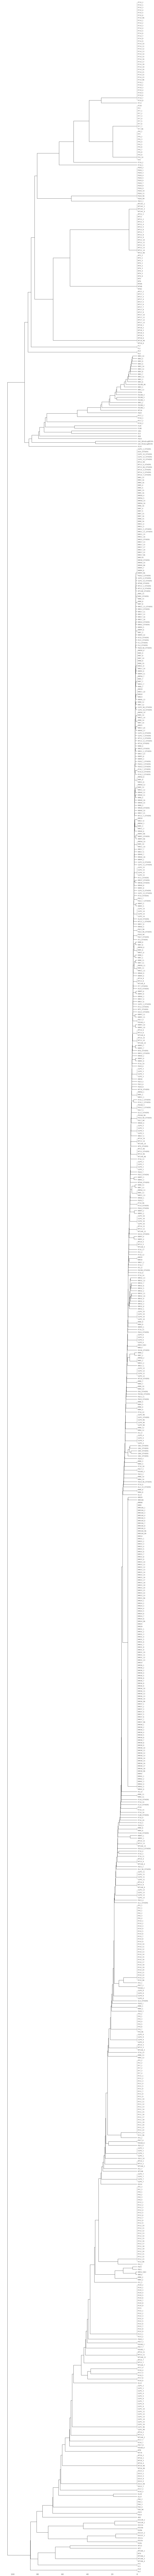

In [39]:
msno.dendrogram(train[missingvalue_columns])

### FInd columns that are mostly nulls

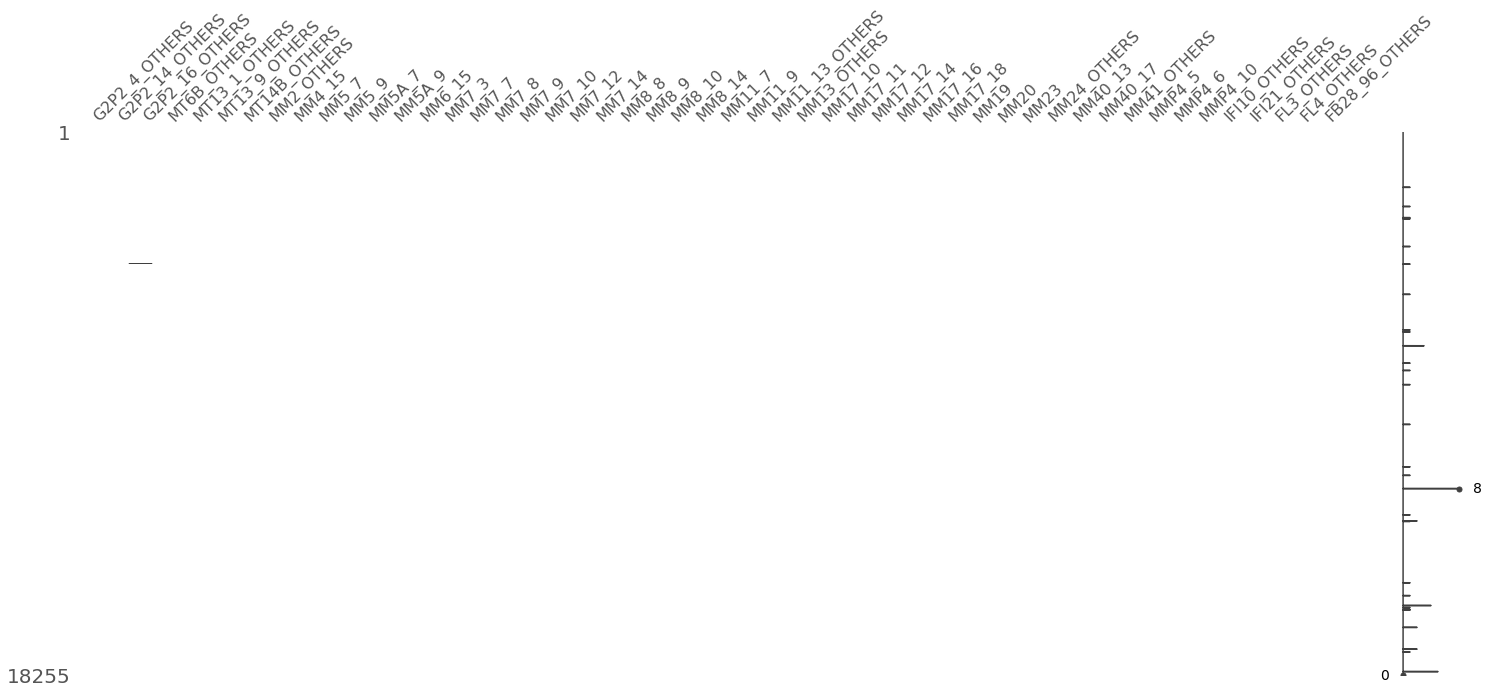

In [50]:
# Columns that are at most 10% full
filtered_data = msno.nullity_filter(train, filter='bottom', n=50, p=0.1) 
msno.matrix(filtered_data)

More to come...